Customers Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Head:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Head:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

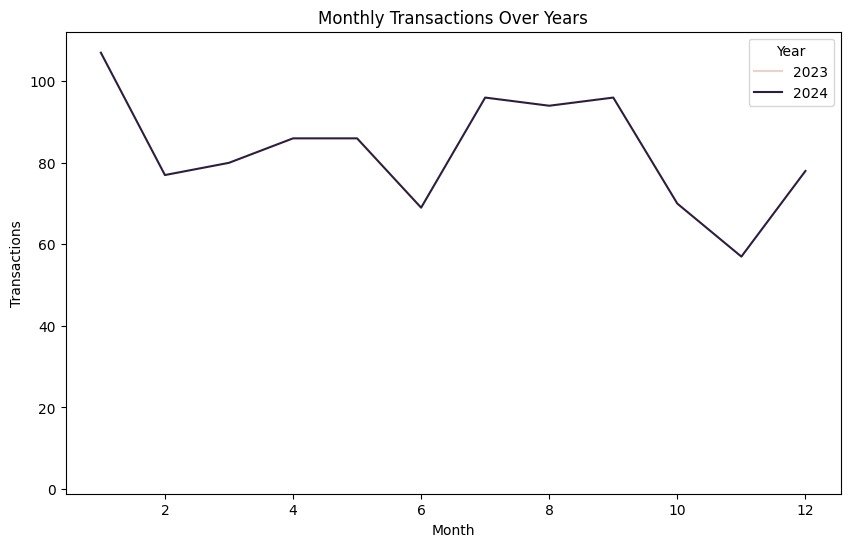

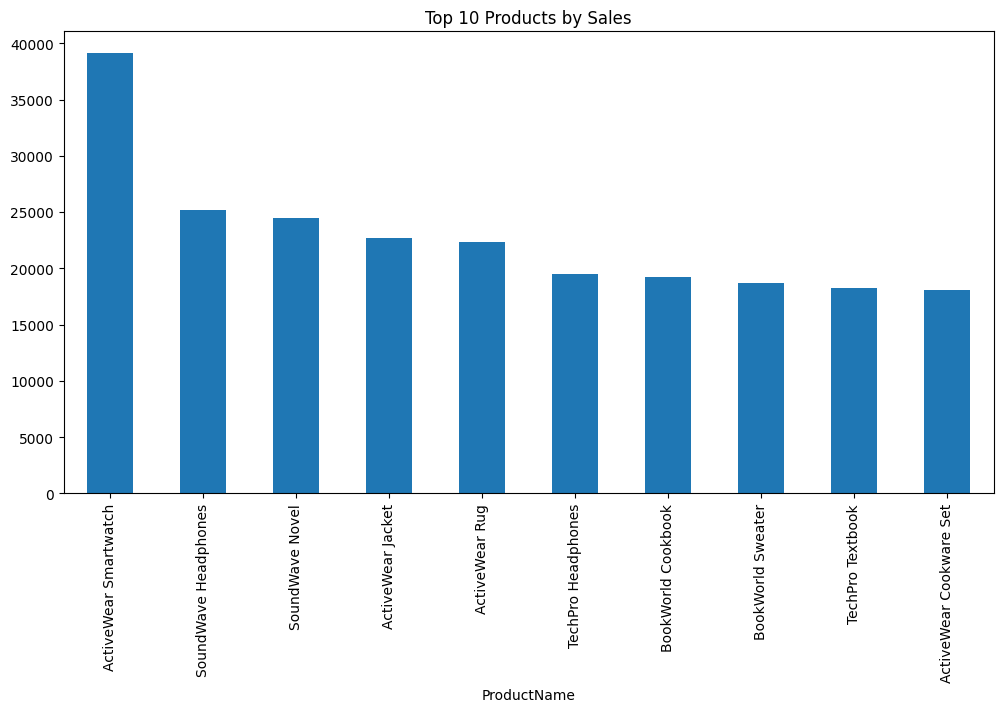

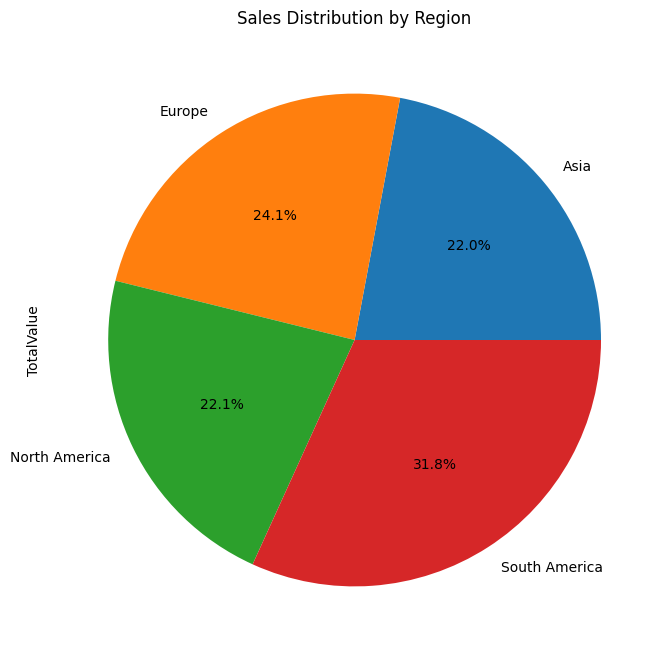

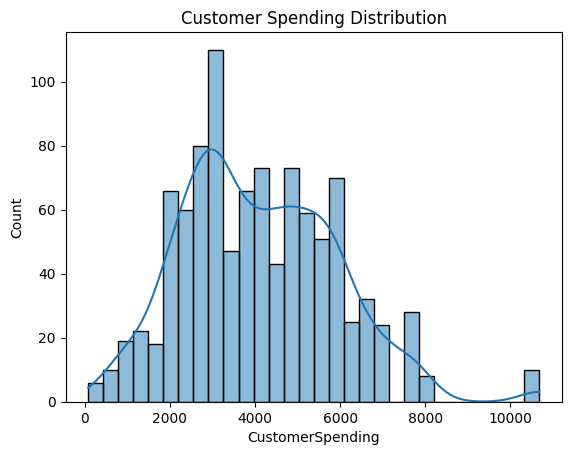

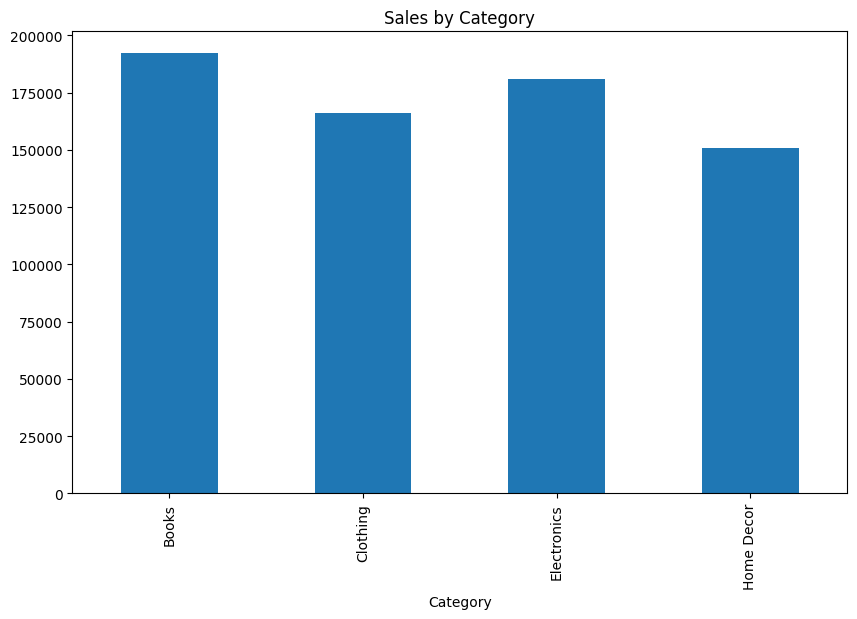

Revenue from loyal customers: 683654.59


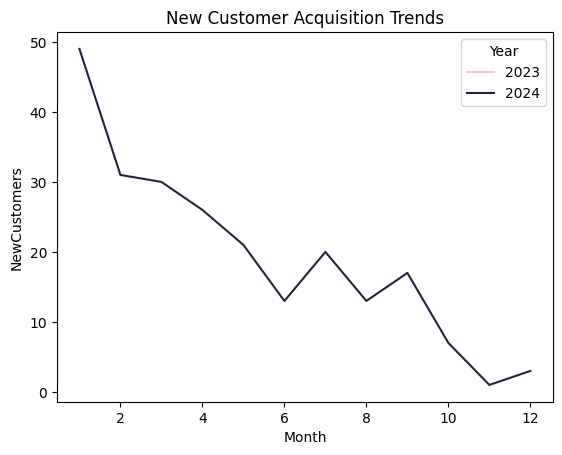

Churn Rate: 6.03%
Revenue Loss Due to Churn: 6340.969999999999
EDA completed and data cleaned.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Head:\n", customers.head())
print("Products Head:\n", products.head())
print("Transactions Head:\n", transactions.head())
print("Merged Dataframe Head:\n", customers.head())

# print("Unique CustomerID in Customers:\n", customers['CustomerID'].unique())
# print("Unique CustomerID in Transactions:\n", transactions['CustomerID'].unique())
# print("Unique ProductID in Products:\n", products['ProductID'].unique())
# print("Unique ProductID in Transactions:\n", transactions['ProductID'].unique())

merged_df = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

print("Merged Dataframe Head:\n", merged_df.head())

missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)


merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])

merged_df['Year'] = merged_df['TransactionDate'].dt.year
merged_df['Month'] = merged_df['TransactionDate'].dt.month

# Visualizations and Business Insights

# 1. Transaction trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df.groupby(['Year', 'Month']).size().reset_index(name='Transactions'),
             x='Month', y='Transactions', hue='Year')
plt.title('Monthly Transactions Over Years')
plt.show()

# 2. Top 10 Products by Sales
product_sales = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10)
product_sales.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.show()

# 3. Regional Sales Distribution
region_sales = merged_df.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title='Sales Distribution by Region')
plt.show()

# 4. Customer Segmentation Based on Spending
merged_df['CustomerSpending'] = merged_df.groupby('CustomerID')['TotalValue'].transform('sum')
sns.histplot(merged_df['CustomerSpending'], bins=30, kde=True)
plt.title('Customer Spending Distribution')
plt.show()

# 5. Category-Wise Analysis
category_sales = merged_df.groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Category')
plt.show()

#6. Customer Retention and Loyalty Analysis
customer_purchases = merged_df.groupby('CustomerID').size().reset_index(name='PurchaseCount')
loyal_customers = customer_purchases[customer_purchases['PurchaseCount'] > 1]
loyalty_revenue = merged_df[merged_df['CustomerID'].isin(loyal_customers['CustomerID'])]['TotalValue'].sum()
print("Revenue from loyal customers:", loyalty_revenue)

#7. Customer Acquisition Trends
merged_df['IsNewCustomer'] = merged_df['SignupDate'] > (merged_df['TransactionDate'] - pd.Timedelta(days=30))
new_customer_trends = merged_df[merged_df['IsNewCustomer']].groupby(['Year', 'Month']).size().reset_index(name='NewCustomers')
sns.lineplot(data=new_customer_trends, x='Month', y='NewCustomers', hue='Year')
plt.title('New Customer Acquisition Trends')
plt.show()

#8. Churn Analysis
churned_customers = customer_purchases[customer_purchases['PurchaseCount'] == 1]
churn_rate = len(churned_customers) / len(customer_purchases) * 100
churn_revenue_loss = merged_df[merged_df['CustomerID'].isin(churned_customers['CustomerID'])]['TotalValue'].sum()
print(f"Churn Rate: {churn_rate:.2f}%")
print("Revenue Loss Due to Churn:", churn_revenue_loss)


# Save cleaned data and visualizations
merged_df.to_csv('Cleaned_Transactions.csv', index=False)
print("EDA completed and data cleaned.")
